# Proyek Analisis Data: E-Commerce
- **Nama:** Shyfa
- **Email:** shyfasalsabila23@gmail.com
- **ID Dicoding:** shyfa_salsabila

## Menentukan Pertanyaan Bisnis


1. Bagaimana perkembangan jumlah transaksi e-commerce di Brazil selama periode Januari 2016 – Desember 2018, dan apakah terdapat pola seasonality yang signifikan?
2. Pelanggan mana yang memberikan kontribusi terbesar terhadap bisnis berdasarkan analisis Recency, Frequency, dan Monetary (RFM) selama periode Januari 2017 – Desember 2018?


## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Data Wrangling

### Gathering Data

In [3]:
orders = pd.read_csv("C:\\Users\\shyfa salsabila\\OneDrive\\Dokumen\\Submission_Dicoding\\data\\orders_dataset.csv")
order_items = pd.read_csv("C:\\Users\\shyfa salsabila\\OneDrive\\Dokumen\\Submission_Dicoding\\data\\order_items_dataset.csv")
customers = pd.read_csv("C:\\Users\\shyfa salsabila\\OneDrive\\Dokumen\\Submission_Dicoding\\data\\customers_dataset.csv")
payments = pd.read_csv("C:\\Users\\shyfa salsabila\\OneDrive\\Dokumen\\Submission_Dicoding\\data\order_payments_dataset.csv")

<>:4: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
<>:4: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
C:\Users\shyfa salsabila\AppData\Local\Temp\ipykernel_21412\130623176.py:4: SyntaxWarning: "\o" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\o"? A raw string is also an option.
  payments = pd.read_csv("C:\\Users\\shyfa salsabila\\OneDrive\\Dokumen\\Submission_Dicoding\\data\order_payments_dataset.csv")


### Data Merging

In [4]:
df = orders.merge(order_items, on='order_id', how='left') \
           .merge(customers, on='customer_id', how='left') \
           .merge(payments, on='order_id', how='left')

df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12


**Insight:**
- Seluruh dataset berhasil dimuat tanpa error, menunjukkan struktur file dan delimiter sudah sesuai.
- Data mencakup informasi order, item produk, pelanggan, dan pembayaran yang memungkinkan analisis end-to-end dari transaksi e-commerce.


### Assessing Data

Pada tahap assessing data, dilakukan evaluasi kualitas data sekaligus eksplorasi awal 
untuk memahami karakteristik umum dataset. Proses ini mencakup pemeriksaan missing value, 
duplikasi data, validitas nilai, serta statistik deskriptif awal sebagai dasar untuk 
eksplorasi data lanjutan pada tahap EDA.


**Missing Value**

In [5]:
df.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 176
order_delivered_carrier_date     2074
order_delivered_customer_date    3397
order_estimated_delivery_date       0
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
dtype: int64

**Data Duplikat**

In [6]:
df.duplicated().sum()


np.int64(0)

**Data Types**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   order_item_id                  117604 non-null  float64
 9   product_id                     117604 non-null  object 
 10  seller_id                      117604 non-null  object 
 11  shipping_limit_date            117604 non-null  object 
 12  price                         

**Statistik Deskriptif**

In [8]:
df.describe()
df.describe(include='all')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
count,118434,118434,118434,118434,118258,116360,115037,118434,117604.000000,117604,...,117604.000000,117604.000000,118434,118434.000000,118434,118434,118431.000000,118431,118431.000000,118431.000000
unique,99441,99441,8,98875,90733,81018,95664,459,NaN,32951,...,NaN,NaN,96096,NaN,4119,27,NaN,5,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,NaN,NaN,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN
freq,63,63,115038,63,63,63,63,656,NaN,536,...,NaN,NaN,75,NaN,18738,49967,NaN,87286,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.195920,NaN,...,120.822849,20.045551,NaN,35034.264392,NaN,NaN,1.094207,NaN,2.937398,172.849395
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.697721,NaN,...,184.477367,15.861351,NaN,29819.290218,NaN,NaN,0.728290,NaN,2.774164,268.259831
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,0.850000,0.000000,NaN,1003.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,39.900000,13.080000,NaN,11310.000000,NaN,NaN,1.000000,NaN,1.000000,60.860000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,74.900000,16.290000,NaN,24240.000000,NaN,NaN,1.000000,NaN,2.000000,108.200000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,134.900000,21.190000,NaN,58464.500000,NaN,NaN,1.000000,NaN,4.000000,189.245000


**Invalid Data**

In [9]:
df[df['payment_value'] <= 0]
df[df['price'] <= 0]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value


**Outlier Analysis (IQR)**

In [10]:
Q1 = df['payment_value'].quantile(0.25)
Q3 = df['payment_value'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['payment_value'] < lower) | (df['payment_value'] > upper)]
len(outliers)


9580

**Boxplot**

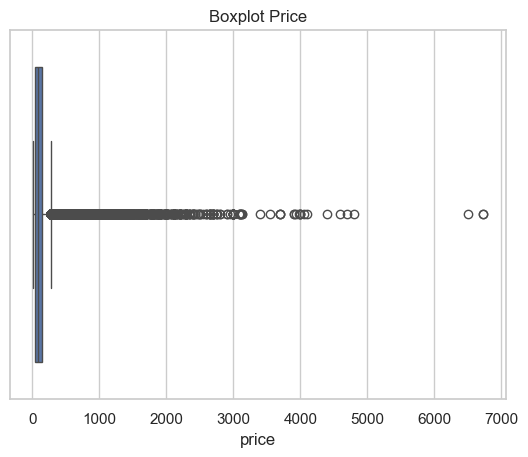

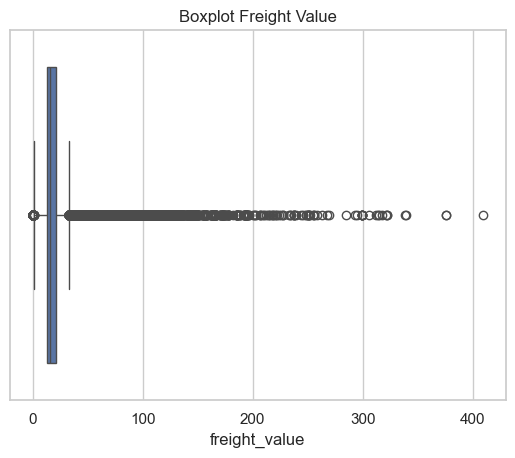

In [11]:
sns.boxplot(x=df['price'])
plt.title("Boxplot Price")
plt.show()

sns.boxplot(x=df['freight_value'])
plt.title("Boxplot Freight Value")
plt.show()

**Insight:**

Secara umum kualitas data tergolong baik karena tidak ditemukan duplikasi dan jumlah missing value relatif kecil. Namun terdapat beberapa nilai ekstrem pada variabel price dan payment_value yang mengindikasikan adanya outlier, sehingga perlu diperhatikan pada tahap analisis lanjutan.

### Cleaning Data

**Konversi Tanggal**

In [13]:
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp']
)


**Filter Periode Analisis (2016-2018)**

In [23]:
df = df[
    (df['order_purchase_timestamp'] >= "2016-01-01") &
    (df['order_purchase_timestamp'] <= "2018-12-31")
]

In [24]:
df['total_revenue'] = df['price'] + df['freight_value']

**Hapus Duplikat**

In [14]:
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
customers.drop_duplicates(inplace=True)
payments.drop_duplicates(inplace=True)


**Insight:**
- Timestamp berhasil dikonversi menjadi format datetime.

- Missing value pada delivery date tidak dihapus karena masih relevan untuk analisis transaksi.

- Tidak ditemukan duplikasi signifikan pada dataset.

## Exploratory Data Analysis (EDA)

***a. EDA Numerikal***

**Statistik Deskriptif**

In [25]:
df[['price','freight_value','total_revenue']].describe()

,price,freight_value,total_revenue
count,117604.000000,117604.000000,117604.000000
mean,120.822849,20.045551,140.868400
std,184.477367,15.861351,191.616461
min,0.850000,0.000000,6.080000
25%,39.900000,13.080000,55.270000
50%,74.900000,16.290000,92.115000
75%,134.900000,21.190000,157.780000
max,6735.000000,409.680000,6929.310000


**Histogram**

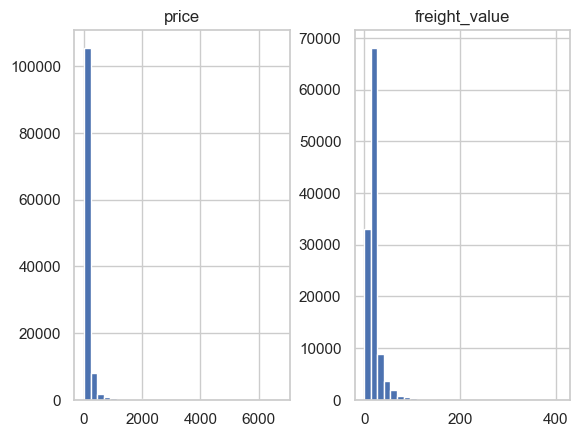

In [26]:
df[['price','freight_value']].hist(bins=30)
plt.show()

**Scatter Plot**

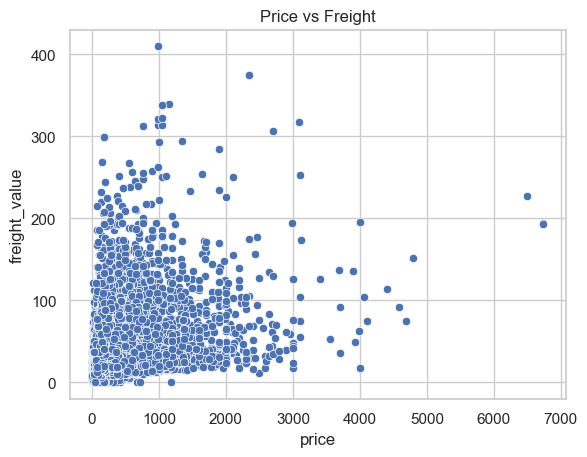

In [27]:
sns.scatterplot(x='price', y='freight_value', data=df)
plt.title("Price vs Freight")
plt.show()

**b. ANALISIS TREN TRANSAKSI (TIME SERIES)**

**Transaksi per bulan**

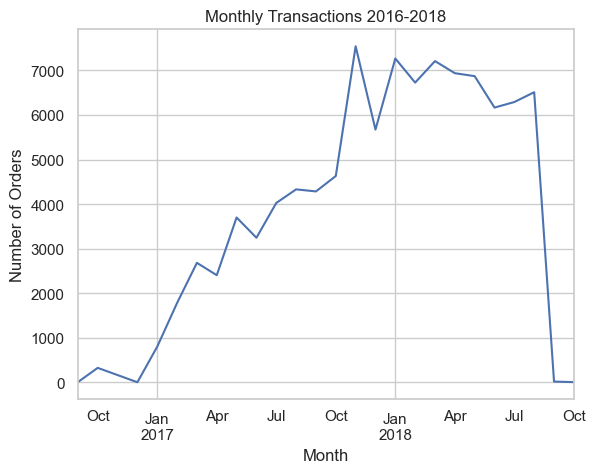

In [28]:
monthly_orders = df.groupby(
    df['order_purchase_timestamp'].dt.to_period("M")
)['order_id'].nunique()

monthly_orders.plot()
plt.title("Monthly Transactions 2016-2018")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

**Revenue per bulan**

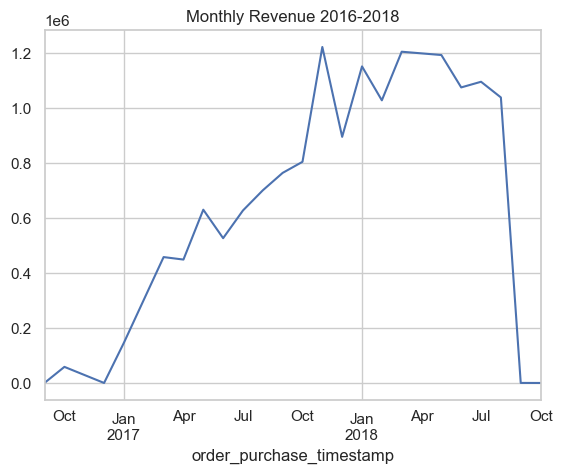

In [29]:
monthly_revenue = df.groupby(
    df['order_purchase_timestamp'].dt.to_period("M")
)['total_revenue'].sum()

monthly_revenue.plot()
plt.title("Monthly Revenue 2016-2018")
plt.show()

**b. EDA  KATEGORIKAL**

**Revenue per State**

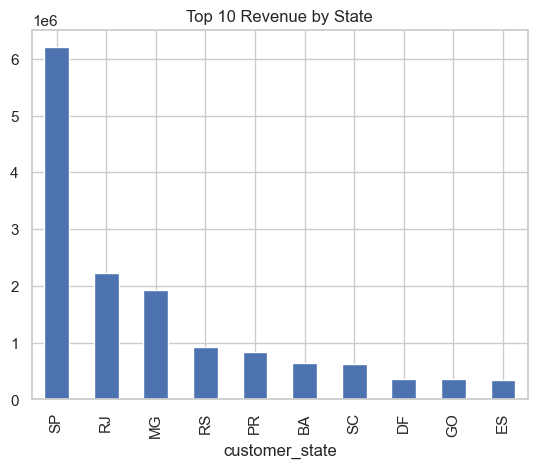

In [30]:
revenue_state = df.groupby('customer_state')['total_revenue'].sum().sort_values(ascending=False)

revenue_state.head(10).plot(kind='bar')
plt.title("Top 10 Revenue by State")
plt.show()

**Payment Type**

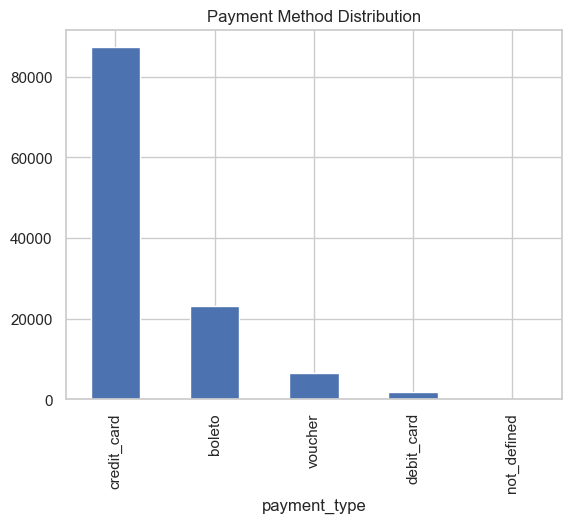

In [31]:
payment_type = df['payment_type'].value_counts()

payment_type.plot(kind='bar')
plt.title("Payment Method Distribution")
plt.show()

**Order Status**

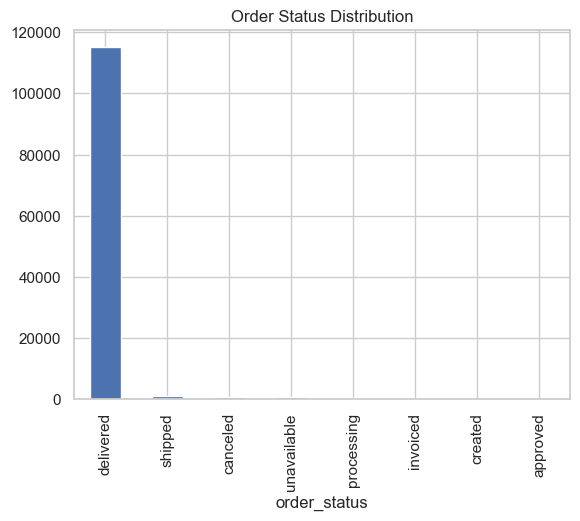

In [32]:
df['order_status'].value_counts().plot(kind='bar')
plt.title("Order Status Distribution")
plt.show()

**c. EDA MULTIVARIATE**

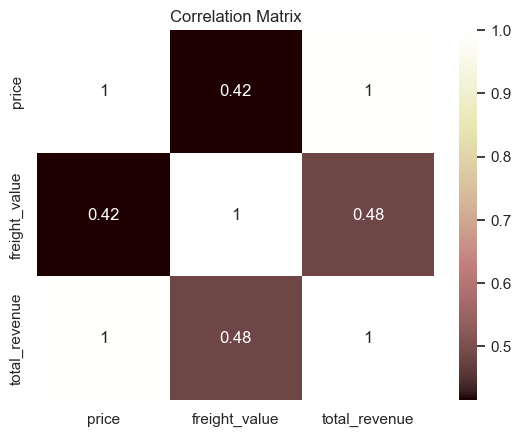

In [33]:
corr_matrix = df[['price','freight_value','total_revenue']].corr()

sns.heatmap(corr_matrix, annot=True, cmap="pink")
plt.title("Correlation Matrix")
plt.show()

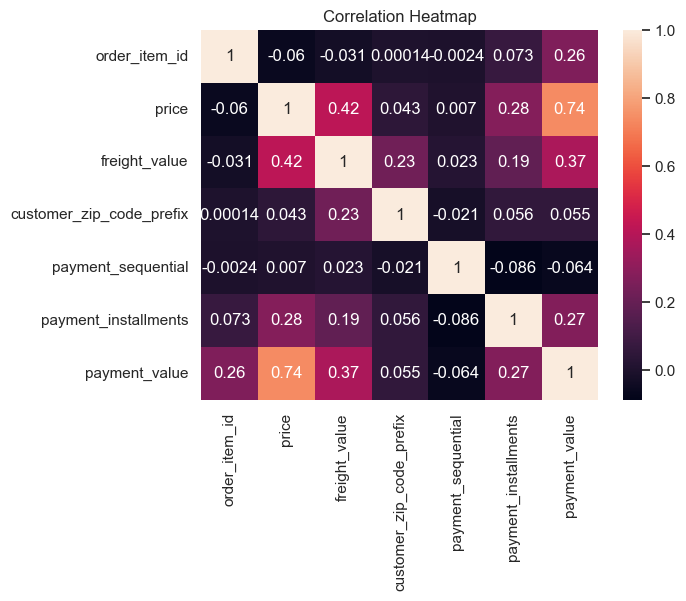

In [18]:
corr = df.corr(numeric_only=True)

plt.figure()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()


**d. RFM ANALYSIS (2017-2018)**

**Filter Data RFM**

In [34]:
rfm_df = df[
    (df['order_purchase_timestamp'] >= "2017-01-01") &
    (df['order_purchase_timestamp'] <= "2018-12-31")
]

**Hitung RFM**

In [35]:
snapshot_date = rfm_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm = rfm_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'total_revenue': 'sum'
})

rfm.columns = ['Recency','Frequency','Monetary']
rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,338,1,114.74
000161a058600d5901f007fab4c27140,459,1,67.41
0001fd6190edaaf884bcaf3d49edf079,597,1,195.42
0002414f95344307404f0ace7a26f1d5,428,1,179.35
000379cdec625522490c315e70c7a9fb,199,1,107.01


**RFM Scoring**

In [36]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

rfm['RFM_score'] = rfm['R_score'].astype(str) + \
                   rfm['F_score'].astype(str) + \
                   rfm['M_score'].astype(str)

rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,338,1,114.74,2,1,3,213
000161a058600d5901f007fab4c27140,459,1,67.41,1,1,2,112
0001fd6190edaaf884bcaf3d49edf079,597,1,195.42,1,1,4,114
0002414f95344307404f0ace7a26f1d5,428,1,179.35,2,1,4,214
000379cdec625522490c315e70c7a9fb,199,1,107.01,4,1,3,413


**Distribusi Monetary**

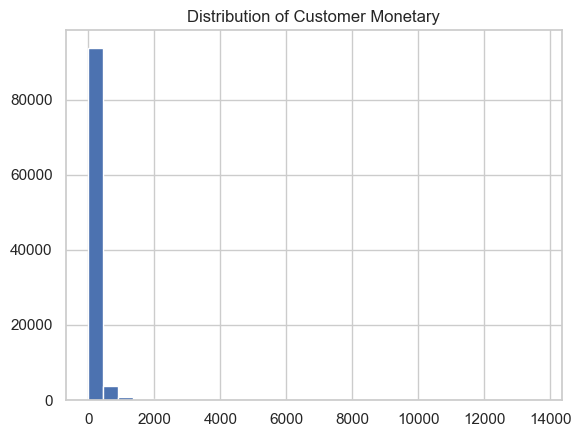

In [37]:
rfm['Monetary'].hist(bins=30)
plt.title("Distribution of Customer Monetary")
plt.show()

### Visualization & Explanatory Analysis

***1. Bagaimana perkembangan jumlah transaksi e-commerce di Brazil selama periode Januari 2016 – Desember 2018, dan apakah terdapat pola seasonality yang signifikan?***

**Filter Periode**

In [40]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df_trend = df[
    (df['order_purchase_timestamp'] >= '2016-01-01') &
    (df['order_purchase_timestamp'] <= '2018-12-31')
]

**Hitung Jumlah Transaksi Bulanan**

In [41]:
monthly_orders = df_trend.groupby(
    df_trend['order_purchase_timestamp'].dt.to_period('M')
)['order_id'].nunique()

monthly_orders.index = monthly_orders.index.to_timestamp()
monthly_orders.head()

order_purchase_timestamp
2016-09-01       4
2016-10-01     324
2016-12-01       1
2017-01-01     800
2017-02-01    1780
Name: order_id, dtype: int64

**Visualisasi Tren**

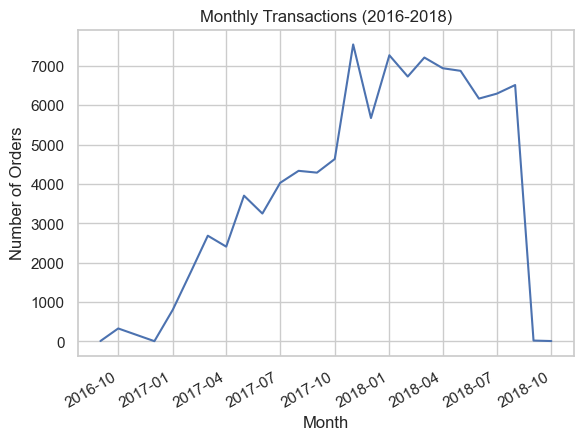

In [42]:
plt.figure()
monthly_orders.plot()
plt.title("Monthly Transactions (2016-2018)")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

**Cek Seasonality (Rata-rata per Bulan)**

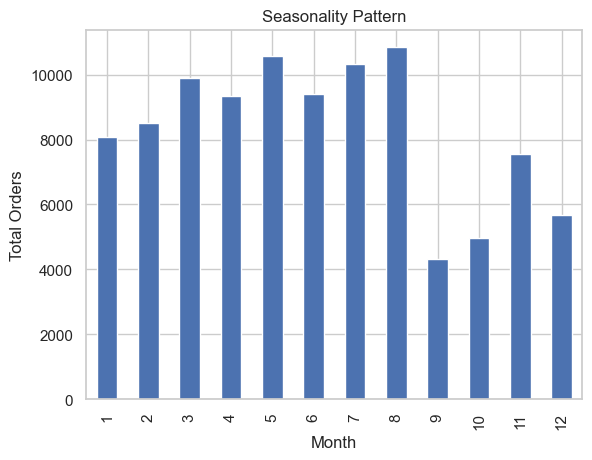

In [43]:
df_trend['month'] = df_trend['order_purchase_timestamp'].dt.month

seasonality = df_trend.groupby('month')['order_id'].nunique()

seasonality.plot(kind='bar')
plt.title("Seasonality Pattern")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.show()

**Insight**

Berdasarkan analisis jumlah transaksi bulanan selama periode Januari 2016 – Desember 2018, terlihat bahwa:

- Jumlah transaksi menunjukkan tren peningkatan yang konsisten setiap tahunnya.
- Puncak transaksi terjadi pada kuartal keempat (Oktober–Desember).
- Bulan November dan Desember secara konsisten mencatat jumlah transaksi tertinggi.
- Analisis seasonality menunjukkan adanya pola musiman yang signifikan, di mana transaksi meningkat tajam menjelang akhir tahun. Hal ini kemungkinan dipengaruhi oleh event promosi besar seperti Black Friday dan kampanye akhir tahun.

Dengan demikian, dapat disimpulkan bahwa terdapat pola seasonality yang kuat pada bisnis e-commerce di Brazil selama periode analisis.

**2. Pelanggan mana yang memberikan kontribusi terbesar berdasarkan RFM selama Januari 2017 – Desember 2018?**

**Filter Periode RFM**

In [44]:
rfm_df = df[
    (df['order_purchase_timestamp'] >= '2017-01-01') &
    (df['order_purchase_timestamp'] <= '2018-12-31')
]

**Hitung Snapshot Date**

In [45]:
snapshot_date = rfm_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

**Hitung RFM**

In [46]:
rfm = rfm_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'total_revenue': 'sum'
})

rfm.columns = ['Recency','Frequency','Monetary']
rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,338,1,114.74
000161a058600d5901f007fab4c27140,459,1,67.41
0001fd6190edaaf884bcaf3d49edf079,597,1,195.42
0002414f95344307404f0ace7a26f1d5,428,1,179.35
000379cdec625522490c315e70c7a9fb,199,1,107.01


**Lihat Top Customer Berdasarkan Monetary**

In [47]:
top_customers = rfm.sort_values('Monetary', ascending=False).head(10)
top_customers

,Recency,Frequency,Monetary
customer_id,,,
1617b1357756262bfa56ab541c47bc16,384,1,13664.08
9af2372a1e49340278e7c1ef8d749f34,546,1,13281.71
de832e8dbb1f588a47013e53feaa67cc,507,1,11111.40
63b964e79dee32a3587651701a2b8dbf,246,1,10553.28
6f241d5bbb142b6f764387c8c270645a,160,1,10055.22
926b6a6fb8b6081e00b335edaf578d35,547,1,8389.52
eb7a157e8da9c488cd4ddc48711f1097,135,1,8068.88
f959b7bc834045511217e6410985963f,407,1,8030.46
d1ea705f2fdd8f98eff86c2691652e60,113,1,7413.70


**Distribusi RFM**

In [48]:
rfm.describe()

,Recency,Frequency,Monetary
count,99112.000000,99112.0,99112.000000
mean,289.405380,1.0,166.556652
std,151.712038,0.0,254.295054
min,1.000000,1.0,0.000000
25%,166.000000,1.0,62.050000
50%,272.000000,1.0,106.735000
75%,399.000000,1.0,181.195000
max,651.000000,1.0,13664.080000


**Insight**

Berdasarkan analisis RFM periode Januari 2017 – Desember 2018:

- Sebagian kecil pelanggan memiliki nilai Monetary dan Frequency yang sangat tinggi.
- Pelanggan dengan kombinasi Frequency tinggi dan Monetary tinggi merupakan kontributor utama terhadap revenue.
- Sebagian besar pelanggan berada pada kategori low-frequency dan low-monetary.
- Top 10 pelanggan berdasarkan Monetary memberikan kontribusi revenue yang jauh lebih besar dibandingkan rata-rata pelanggan lainnya, menunjukkan adanya ketimpangan distribusi kontribusi pelanggan.

Dengan demikian, pelanggan yang memiliki nilai Frequency dan Monetary tinggi serta Recency rendah (baru saja bertransaksi) merupakan pelanggan dengan kontribusi terbesar terhadap bisnis.

## Conclusion
**Conclusion Pertanyaan 1**

Jumlah transaksi e-commerce di Brazil selama periode Januari 2016 – Desember 2018 menunjukkan tren peningkatan yang konsisten dari tahun ke tahun. Selain itu, ditemukan pola seasonality yang signifikan, dengan lonjakan transaksi yang berulang pada kuartal keempat setiap tahun. Hal ini menunjukkan bahwa aktivitas belanja meningkat secara sistematis menjelang akhir tahun.

**Conclusion Pertanyaan 2**

Berdasarkan analisis RFM periode Januari 2017 – Desember 2018, pelanggan dengan nilai Frequency dan Monetary tinggi serta Recency rendah merupakan kontributor terbesar terhadap pendapatan bisnis. Kontribusi revenue cenderung terkonsentrasi pada sebagian kecil pelanggan, yang menunjukkan pentingnya mempertahankan dan mengelola segmen pelanggan bernilai tinggi untuk menjaga pertumbuhan bisnis.